[*********************100%%**********************]  1 of 1 completed


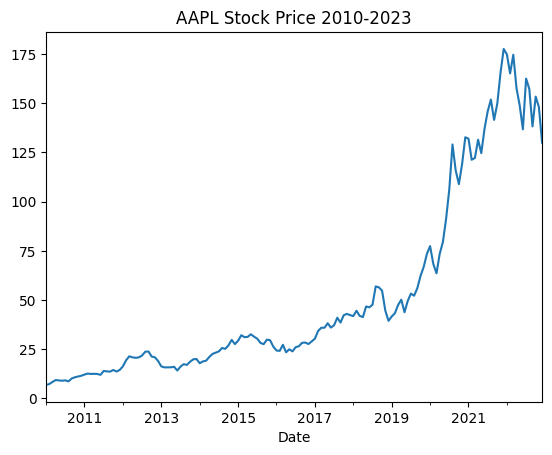

(1, 1, 1)    30
(0, 1, 1)    24
(1, 1, 0)    24
(1, 0, 1)    20
(1, 0, 0)    17
(0, 0, 1)    16
(0, 1, 0)    13
(0, 0, 0)    10
dtype: int64


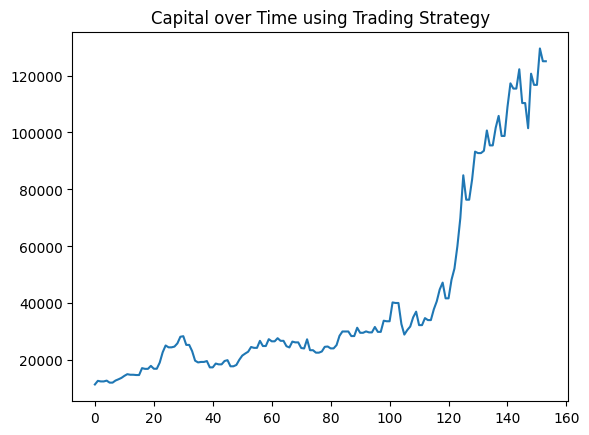

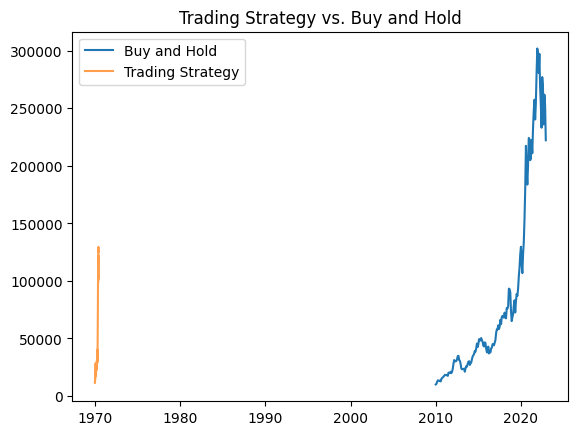

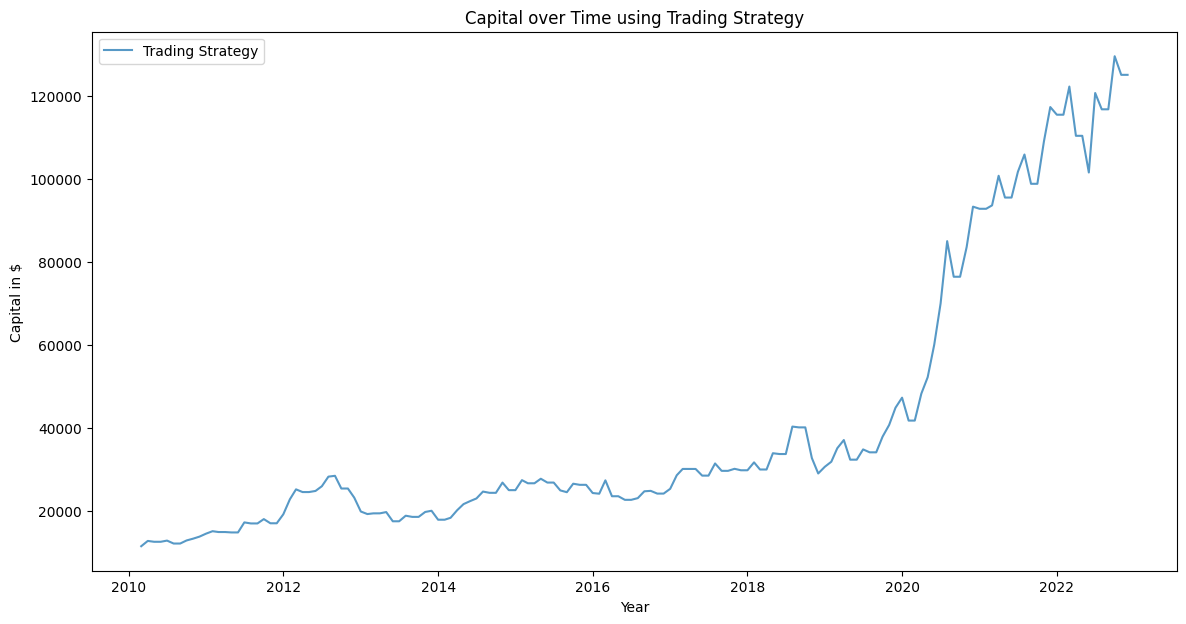

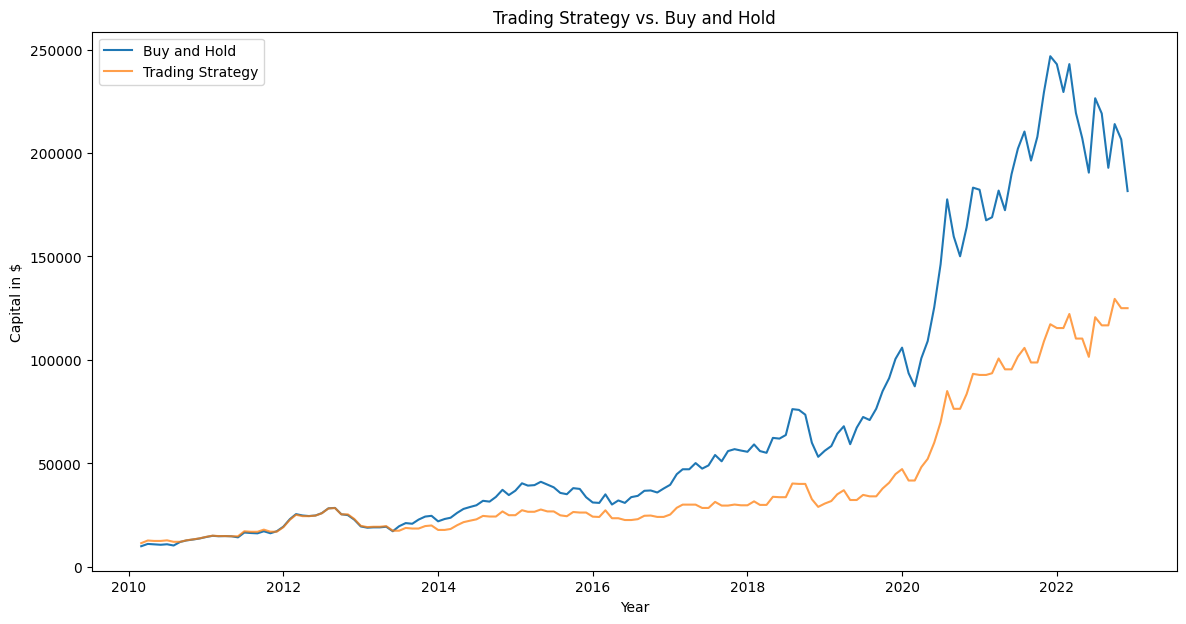

In [2]:
!pip install pandas numpy matplotlib yfinance
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
# Fetch historical data for AAPL
aapl_data = yf.download('AAPL', start='2010-01-01', end='2023-01-01', interval='1mo')
aapl_data['Close'].plot(title="AAPL Stock Price 2010-2023")
plt.show()
# Calculate monthly returns
aapl_data['Monthly Return'] = aapl_data['Adj Close'].pct_change()
# Convert monthly returns to binary outcomes (1 for positive return, 0 for negative)
aapl_data['Outcome'] = np.where(aapl_data['Monthly Return'] > 0, 1, 0)
# Create sequences of 3 months
sequences = [tuple(aapl_data['Outcome'][i:i+3]) for i in range(len(aapl_data) - 2)]

# Count occurrences of each unique sequence
sequence_counts = pd.Series(sequences).value_counts()

print(sequence_counts)
def trading_strategy(data):
    initial_capital = 10000  # Starting with $10,000
    capital = initial_capital
    positions = []  # To track our positions over time

    for i in range(2, len(data)):
        if data.iloc[i-1]['Outcome'] == 1:
            capital += capital * data.iloc[i]['Monthly Return']
        elif data.iloc[i-1]['Outcome'] == 0 and data.iloc[i-2]['Outcome'] == 0:
            capital += capital * data.iloc[i]['Monthly Return']
        positions.append(capital)

    return positions

# Apply strategy
positions = trading_strategy(aapl_data)

# Plot the result
plt.plot(positions)
plt.title('Capital over Time using Trading Strategy')
plt.show()
# Buy and Hold Strategy for comparison
buy_and_hold = 10000 * (aapl_data['Adj Close'] / aapl_data['Adj Close'].iloc[0])

# Plot both strategies
plt.plot(buy_and_hold, label='Buy and Hold')
plt.plot(positions, label='Trading Strategy', alpha=0.75)
plt.legend()
plt.title('Trading Strategy vs. Buy and Hold')
plt.show()

##############

def trading_strategy(data):
    initial_capital = 10000  # Starting with $10,000
    capital = initial_capital
    capital_over_time = pd.DataFrame(index=data.index[2:], columns=['Capital'])

    for i in range(2, len(data)):
        if data.iloc[i-1]['Outcome'] == 1:
            capital += capital * data.iloc[i]['Monthly Return']
        elif data.iloc[i-1]['Outcome'] == 0 and data.iloc[i-2]['Outcome'] == 0:
            capital += capital * data.iloc[i]['Monthly Return']
        capital_over_time.iloc[i-2] = capital

    return capital_over_time

# Apply the strategy
capital_over_time = trading_strategy(aapl_data)

# Adjust plot code to use DataFrame with datetime index
plt.figure(figsize=(14, 7))
plt.plot(aapl_data.index[2:], capital_over_time['Capital'], label='Trading Strategy', alpha=0.75)
plt.title('Capital over Time using Trading Strategy')
plt.xlabel('Year')
plt.ylabel('Capital in $')
plt.legend()
plt.show()


# Adjust buy-and-hold strategy to have the same starting point for a fair comparison
buy_and_hold_adjusted = 10000 * (aapl_data['Adj Close'] / aapl_data['Adj Close'].iloc[2])

plt.figure(figsize=(14, 7))
plt.plot(aapl_data.index[2:], buy_and_hold_adjusted[2:], label='Buy and Hold')
plt.plot(capital_over_time.index, capital_over_time['Capital'], label='Trading Strategy', alpha=0.75)
plt.legend()
plt.title('Trading Strategy vs. Buy and Hold')
plt.xlabel('Year')
plt.ylabel('Capital in $')
plt.show()
